In [36]:
import pandas as pd
df = pd.read_csv('baseline.csv')
df

,SHA,cbo,wmc,dit,rfc,lcom,totalMethods,totalFields,nosi,loc,...,tryCatchQty,parenthesizedExpsQty,stringLiteralsQty,numbersQty,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocks,uniqueWordsQty,defect
0,7a955fd6c7de2bd912be544dcfe77f9173a7aa600,5,60,2,55,189,27,5,30,247,...,4,2,47,9,27,5,17,3,191,0
1,000f1ab4780fc9460975791c52597f7c04e15be70,3,10,1,1,9,7,4,1,38,...,0,0,0,22,4,0,4,2,69,0
2,000f1ab4780fc9460975791c52597f7c04e15be71,3,10,1,1,9,7,4,0,38,...,0,0,0,22,4,0,4,2,69,1
3,0024dbdd6ba3cc7797cc0b1ae537dcdc488c4c270,20,59,3,63,189,24,9,4,262,...,0,6,6,14,45,8,41,4,222,0
4,0024dbdd6ba3cc7797cc0b1ae537dcdc488c4c271,21,58,2,61,189,24,9,0,260,...,0,6,6,14,45,8,41,4,222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,ffd1ed788cbf10bed00d49d79c7ee44250c36ac11,52,124,12,144,963,110,9,0,804,...,0,0,26,16,32,4,30,6,689,1
6048,ffdf4a3fcccb7489548c6a2ff6af7cebc92a180c0,24,27,2,46,4,8,8,0,126,...,0,1,3,14,27,0,24,3,108,0
6049,ffdf4a3fcccb7489548c6a2ff6af7cebc92a180c1,22,27,1,46,4,8,8,0,126,...,0,1,3,14,27,0,24,3,108,1
6050,ffe7c9989a4553d35fd1d5041d0cece0a673a0c80,3,12,2,12,28,8,0,1,67,...,2,0,0,2,10,0,8,2,36,0


In [37]:
# 1.1 Pisahkan Fitur (X) dan Target (y)
X = df.drop(['SHA', 'defect'], axis=1) # Hapus SHA dan target
y = df['defect']

# 1.2 Cek Missing Values (Contoh)
print("Missing values per kolom:")
print(X.isnull().sum())
# Jika ada missing values, Anda perlu strategi:
# X = X.fillna(X.mean()) # Contoh: imputasi dengan mean

# 1.3 Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X_scaled sekarang adalah array NumPy, jika ingin kembali ke DataFrame (opsional):
# X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

Missing values per kolom:
cbo                     0
wmc                     0
dit                     0
rfc                     0
lcom                    0
totalMethods            0
totalFields             0
nosi                    0
loc                     0
returnQty               0
loopQty                 0
comparisonsQty          0
tryCatchQty             0
parenthesizedExpsQty    0
stringLiteralsQty       0
numbersQty              0
assignmentsQty          0
mathOperationsQty       0
variablesQty            0
maxNestedBlocks         0
uniqueWordsQty          0
dtype: int64


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
# test_size=0.3 berarti 30% untuk data uji
# random_state=42 untuk reproduktifitas
# stratify=y penting untuk masalah klasifikasi agar proporsi kelas target sama di train dan test set

In [39]:
#Model 1 Regresi Logistik
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Inisialisasi dan latih model
log_reg = LogisticRegression(random_state=42, max_iter=1000) # max_iter mungkin perlu disesuaikan
log_reg.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_log_reg = log_reg.predict(X_test)

# Evaluasi
print("--- Logistic Regression ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.4f}") # Fokus pada prediksi positif yang benar
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")     # Fokus pada menemukan semua instance positif
print(f"F1-score: {f1_score(y_test, y_pred_log_reg):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

--- Logistic Regression ---
Accuracy: 0.7153
Precision: 0.6675
Recall: 0.8579
F1-score: 0.7508
Confusion Matrix:
 [[520 388]
 [129 779]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.57      0.67       908
           1       0.67      0.86      0.75       908

    accuracy                           0.72      1816
   macro avg       0.73      0.72      0.71      1816
weighted avg       0.73      0.72      0.71      1816



In [40]:
#Model 2 Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi dan latih model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_tree = tree_clf.predict(X_test)

# Evaluasi
print("\n--- Decision Tree ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tree):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_tree):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


--- Decision Tree ---
Accuracy: 0.6289
Precision: 0.6336
Recall: 0.6112
F1-score: 0.6222
Confusion Matrix:
 [[587 321]
 [353 555]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.65      0.64       908
           1       0.63      0.61      0.62       908

    accuracy                           0.63      1816
   macro avg       0.63      0.63      0.63      1816
weighted avg       0.63      0.63      0.63      1816



In [41]:
#Model 3 Random Forest
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi dan latih model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators adalah jumlah pohon
rf_clf.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_rf = rf_clf.predict(X_test)

# Evaluasi
print("\n--- Random Forest ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


--- Random Forest ---
Accuracy: 0.6872
Precision: 0.6824
Recall: 0.7004
F1-score: 0.6913
Confusion Matrix:
 [[612 296]
 [272 636]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68       908
           1       0.68      0.70      0.69       908

    accuracy                           0.69      1816
   macro avg       0.69      0.69      0.69      1816
weighted avg       0.69      0.69      0.69      1816



In [42]:
# Jika menggunakan Random Forest (rf_clf yang sudah dilatih) Model seperti Random Forest dan Decision Tree bisa memberikan informasi tentang fitur mana yang paling penting dalam membuat prediksi. Ini bisa membantu Anda memahami faktor-faktor utama penyebab defect.

importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
print("\nFeature Importances (Random Forest):")
print(feature_importance_df.sort_values(by='importance', ascending=False))


Feature Importances (Random Forest):
                 feature  importance
7                   nosi    0.318177
0                    cbo    0.068215
3                    rfc    0.052484
8                    loc    0.050412
20        uniqueWordsQty    0.048641
2                    dit    0.046709
1                    wmc    0.040056
16        assignmentsQty    0.035140
4                   lcom    0.033179
14     stringLiteralsQty    0.033137
18          variablesQty    0.031985
9              returnQty    0.030807
15            numbersQty    0.030664
5           totalMethods    0.030544
11        comparisonsQty    0.028310
17     mathOperationsQty    0.026981
6            totalFields    0.026246
19       maxNestedBlocks    0.020189
10               loopQty    0.018219
12           tryCatchQty    0.015102
13  parenthesizedExpsQty    0.014804


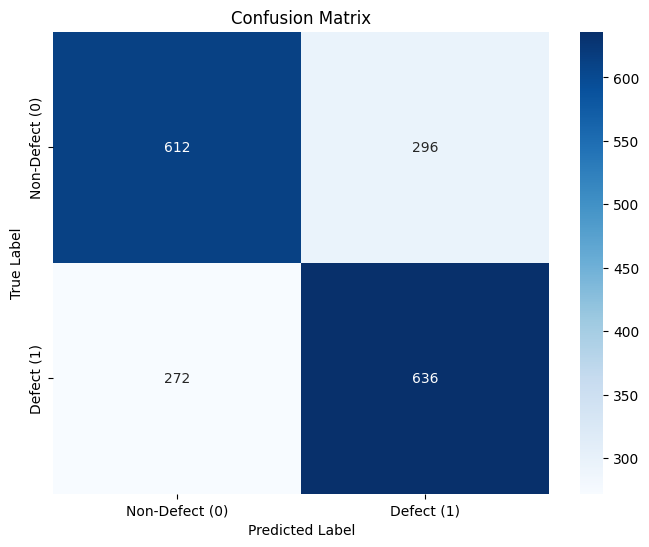

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np # Untuk contoh data jika belum ada


y_actual_for_cm = y_test # Gunakan y_test Anda
y_predicted_for_cm = y_pred_rf # Gunakan prediksi dari model Random Forest Anda (atau model lain)



cm = confusion_matrix(y_actual_for_cm, y_predicted_for_cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Defect (0)', 'Defect (1)'], yticklabels=['Non-Defect (0)', 'Defect (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# Untuk menyimpan gambar:
# plt.savefig('confusion_matrix.png')
plt.show()

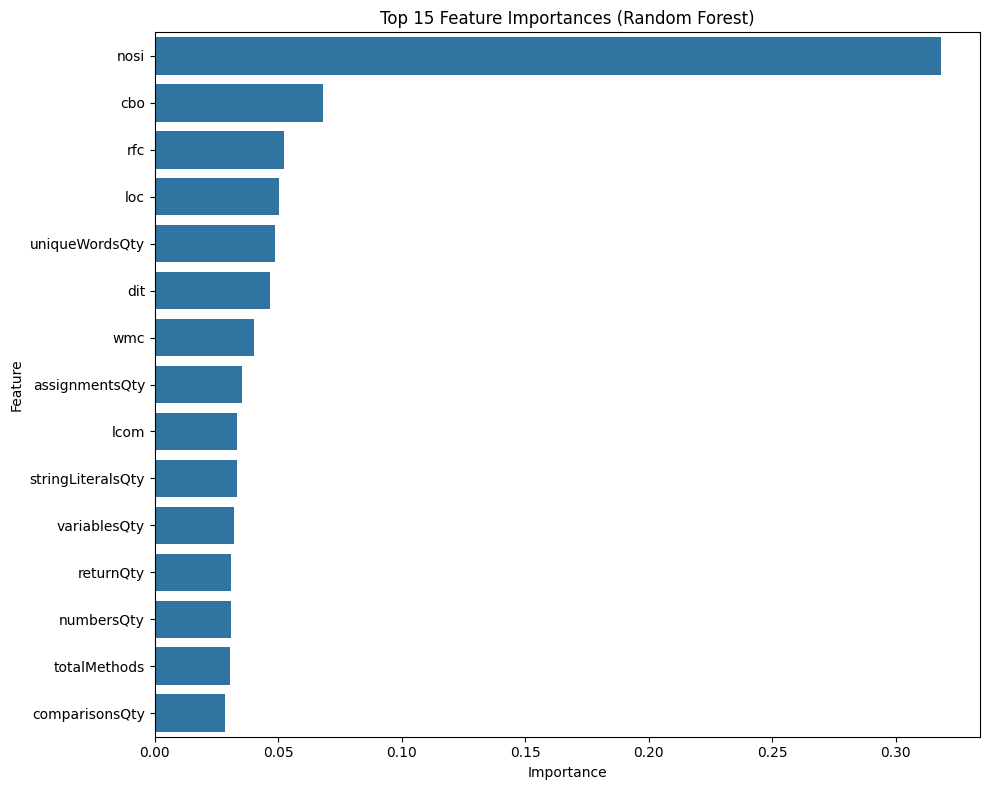

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Untuk contoh data


model_for_fi = rf_clf # Gunakan model Random Forest Anda yang sudah dilatih
feature_names_for_fi = X.columns # Gunakan nama kolom fitur Anda



importances = model_for_fi.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names_for_fi, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15)) # Tampilkan top 15 fitur
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
# Untuk menyimpan gambar:
# plt.savefig('feature_importances.png')
plt.tight_layout() # Untuk memastikan label tidak terpotong
plt.show()

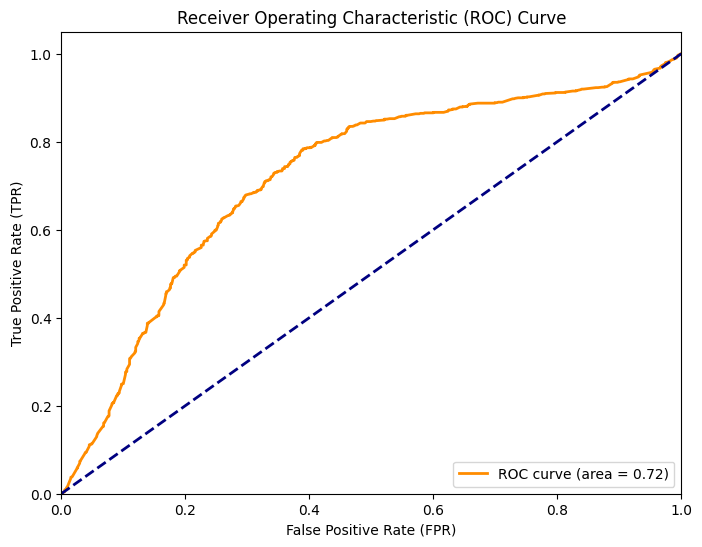

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np # Untuk contoh data


y_actual_for_roc = y_test # Gunakan y_test Anda
y_pred_proba_for_roc = rf_clf.predict_proba(X_test)[:, 1] # Gunakan probabilitas dari model Anda



fpr, tpr, thresholds = roc_curve(y_actual_for_roc, y_pred_proba_for_roc)
auc_score = roc_auc_score(y_actual_for_roc, y_pred_proba_for_roc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Garis acak (random chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Untuk menyimpan gambar:
# plt.savefig('roc_curve.png')
plt.show()